In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
plt.rcParams.update({
    "font.size": 15,
    "font.family": "Arial"
})
bxwidth = 1

In [2]:
df = pd.read_csv("D:/pml/loan_approval_dataset.csv")

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
print(df.describe())
print(df.info())

           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06       

In [6]:
print(df.isnull().sum())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [7]:
cols = df.columns
print(cols)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [8]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(numeric_cols)

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


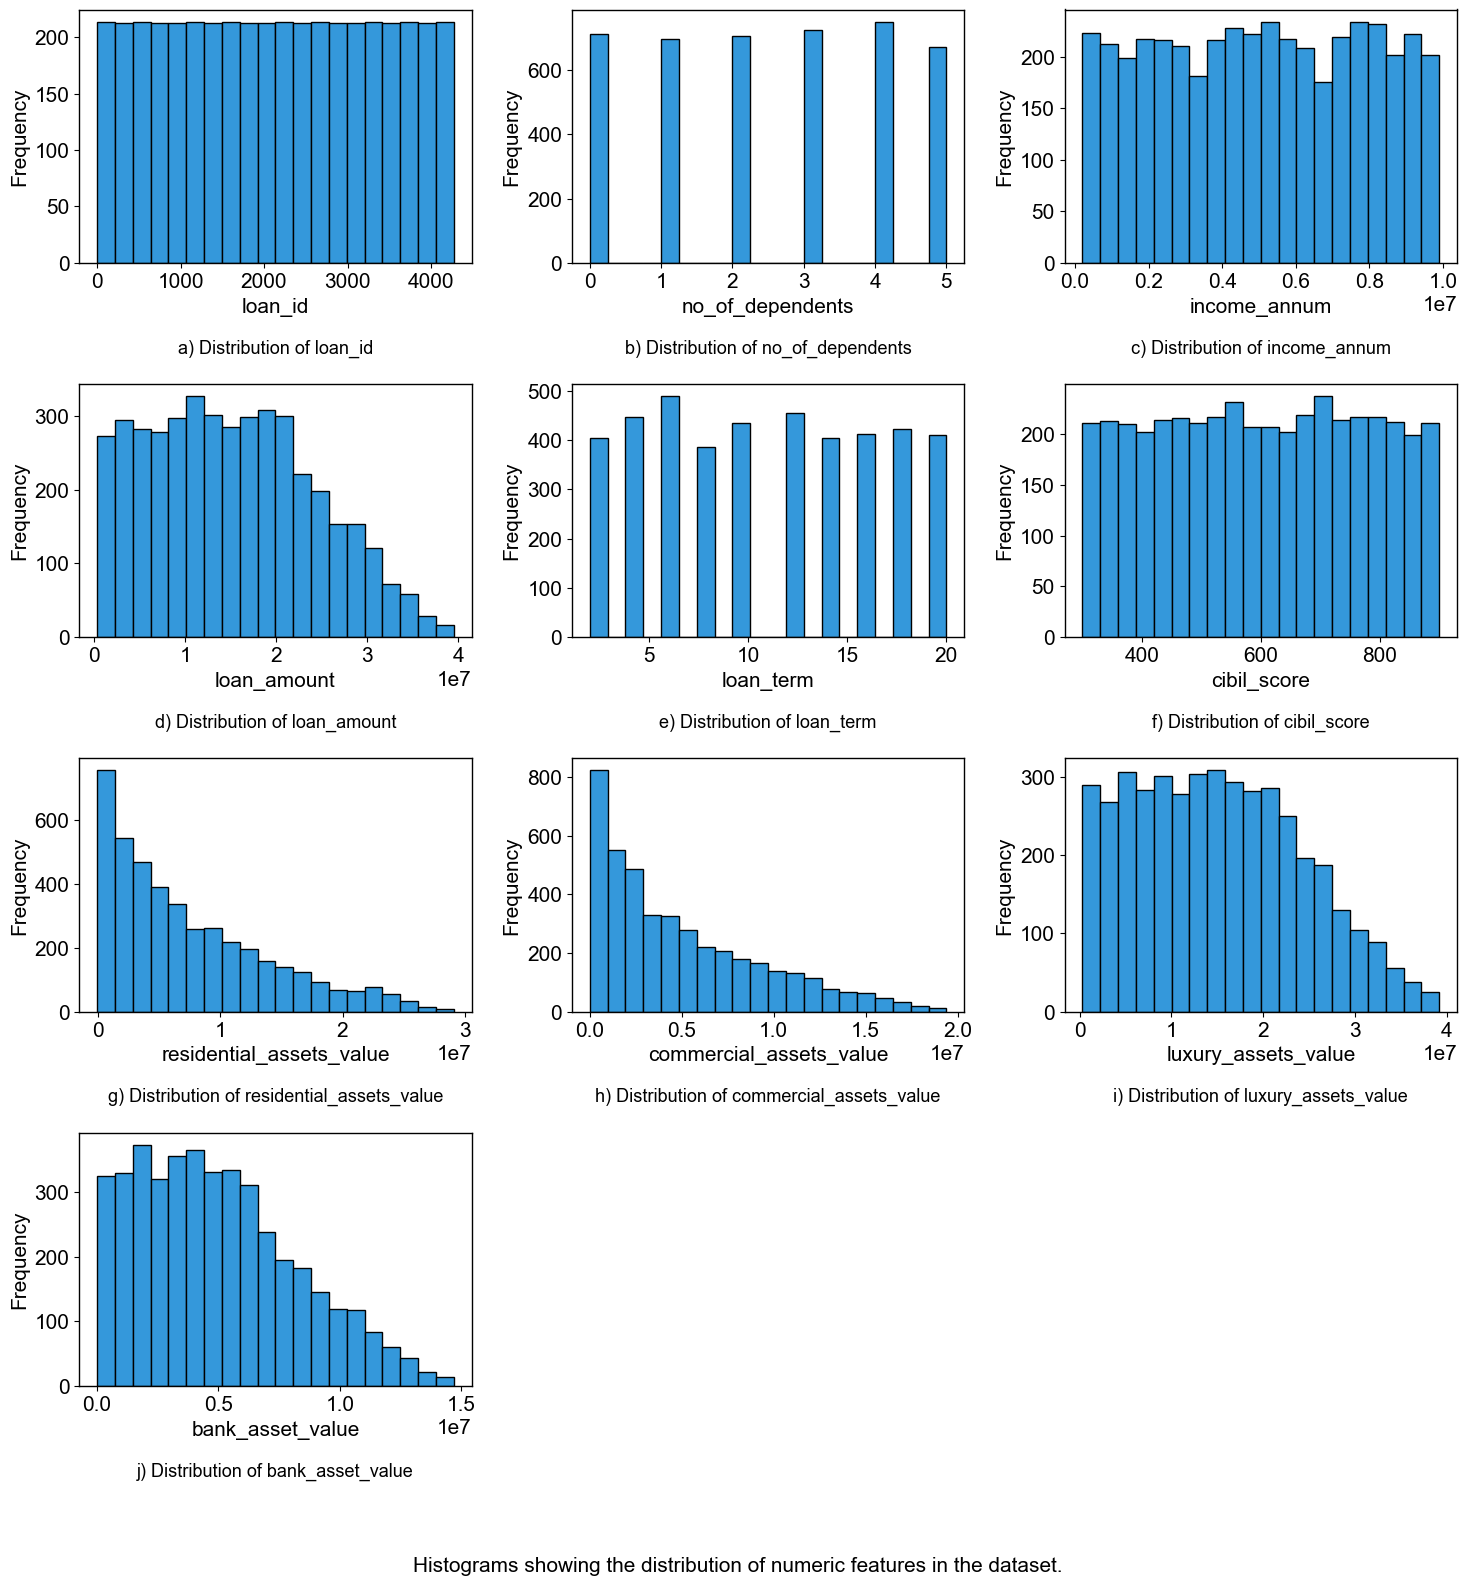

In [9]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
cols = numeric_df.columns
rows = math.ceil(len(cols) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()
subplot_labels = [f"{chr(97+i)})" for i in range(len(cols))]

for i, col in enumerate(cols):
    ax = axes[i]
    ax.hist(numeric_df[col].dropna(), bins=20, edgecolor="black", color="#3498db")
    
    ax.set_title("")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    
    ax.text(0.5, -0.30, f"{subplot_labels[i]} Distribution of {col}", 
            ha="center", va="top", transform=ax.transAxes, fontsize=13)

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.01, "Histograms showing the distribution of numeric features in the dataset.", 
         ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("histogram_numeric_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

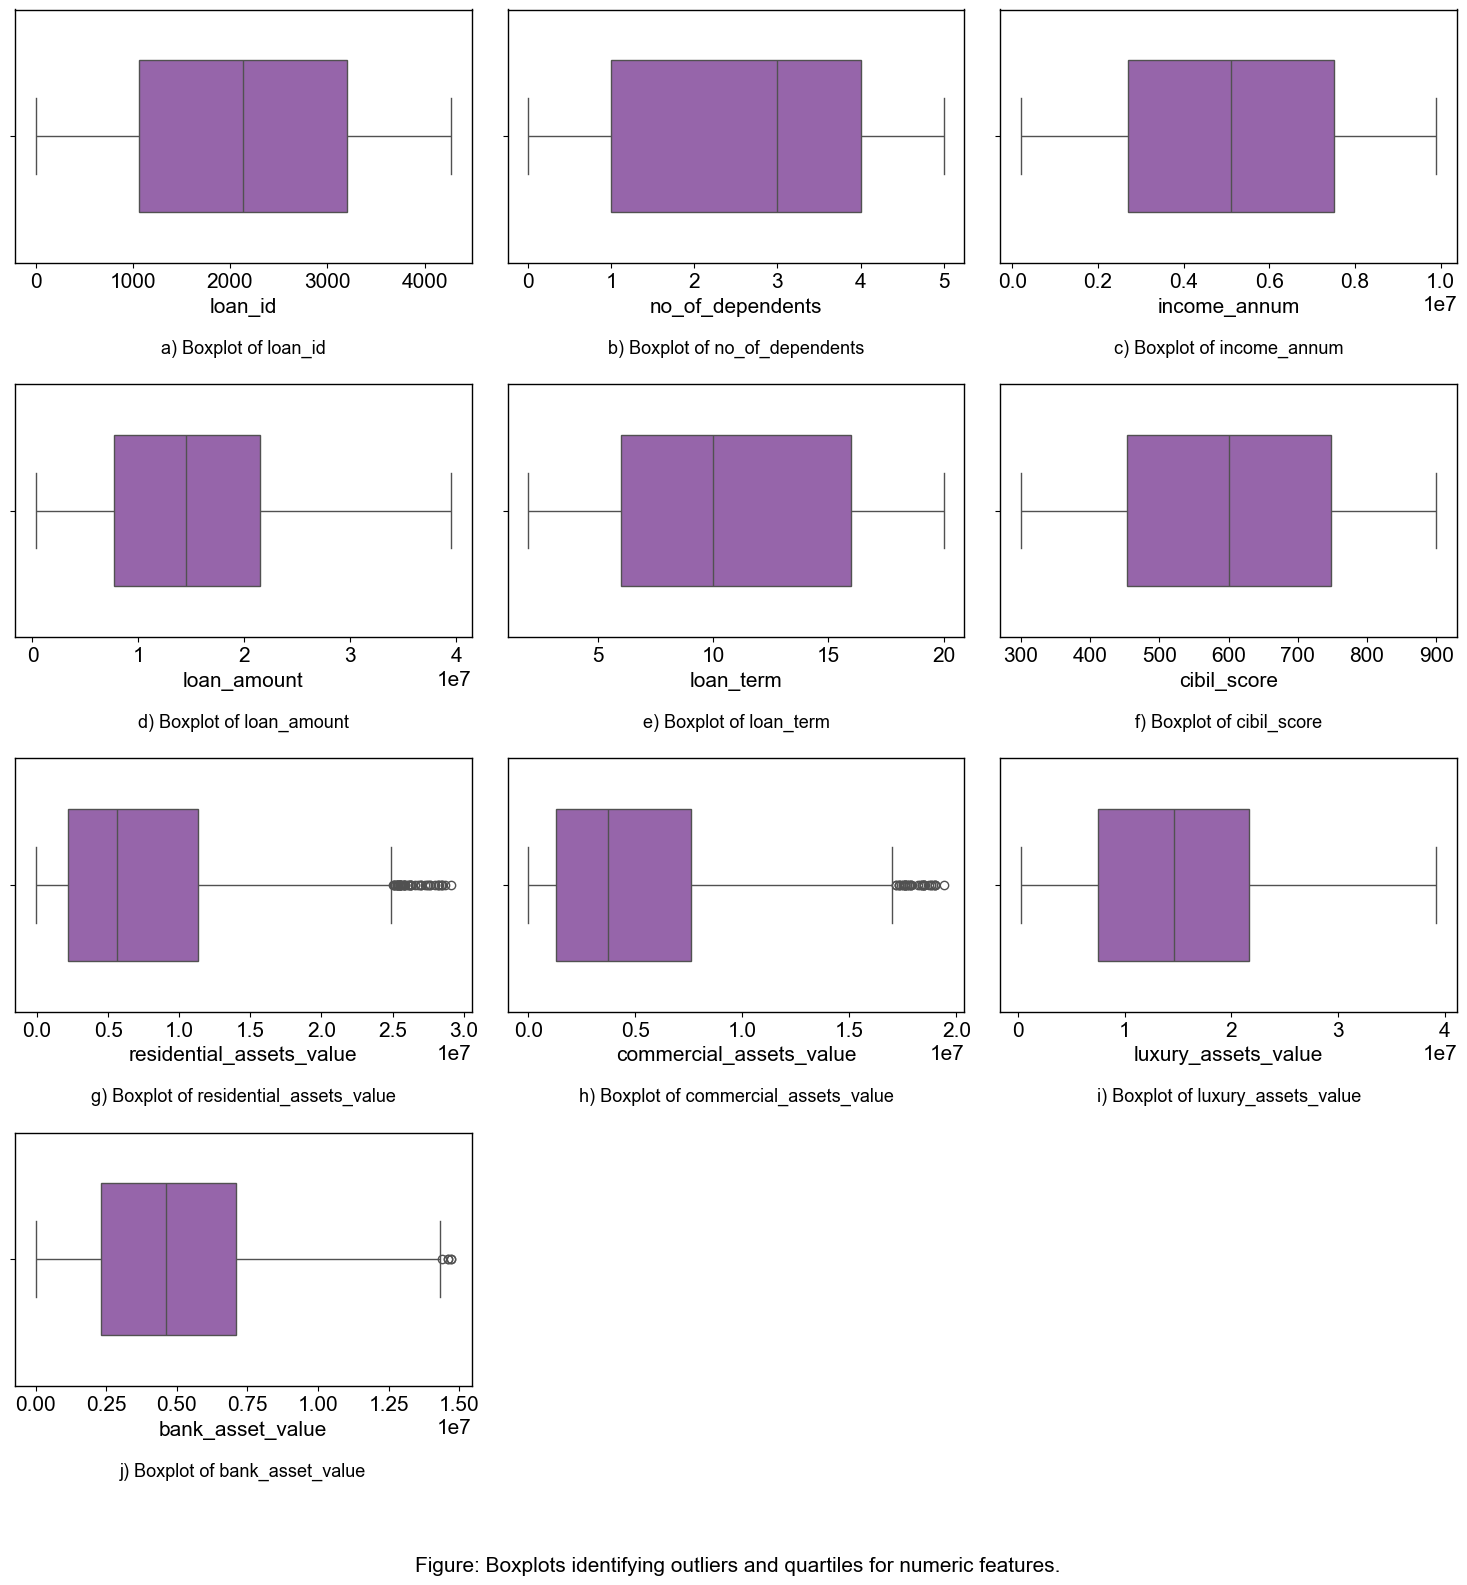

In [10]:
rows = math.ceil(len(cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.boxplot(x=numeric_df[col], ax=ax, color="#9b59b6", width=0.6)
    
    ax.set_title("")
    ax.set_xlabel(col)
    
    ax.text(0.5, -0.30, f"{subplot_labels[i]} Boxplot of {col}", 
            ha="center", va="top", transform=ax.transAxes, fontsize=13)

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.01, "Figure: Boxplots identifying outliers and quartiles for numeric features.", 
         ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("boxplot_numeric_features.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

C:\Users\KESHA\AppData\Local\Temp\ipykernel_15916\3130164084.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, edgecolor="black", palette="viridis")
C:\Users\KESHA\AppData\Local\Temp\ipykernel_15916\3130164084.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, edgecolor="black", palette="viridis")
C:\Users\KESHA\AppData\Local\Temp\ipykernel_15916\3130164084.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=ax, edgecolor="black", palette="viridis")


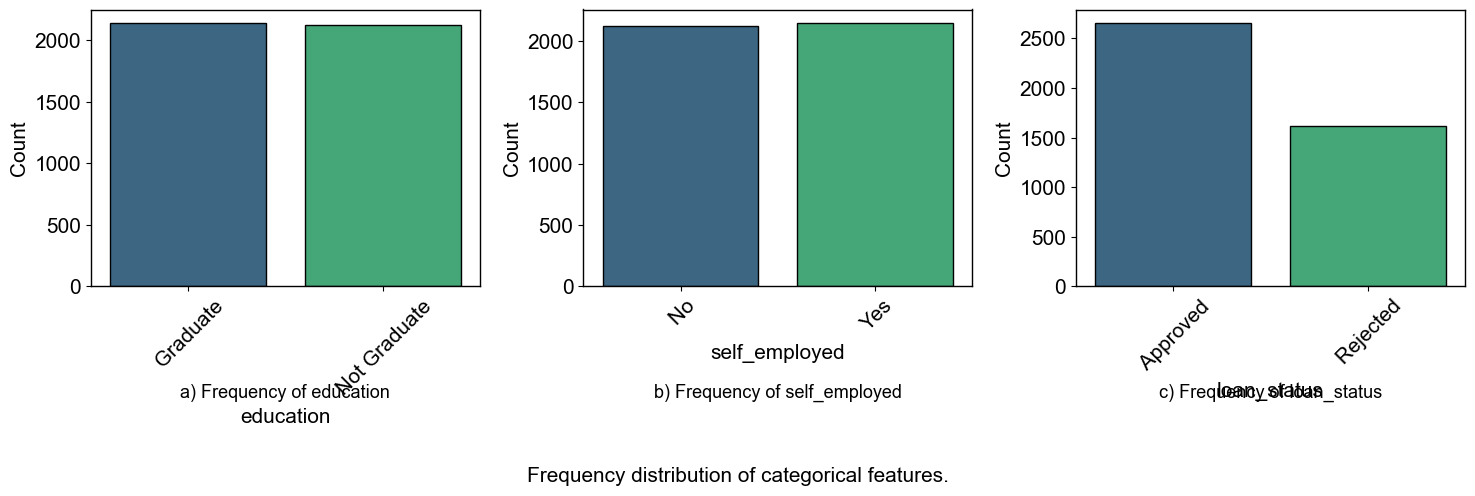

In [11]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
rows = math.ceil(len(categorical_cols) / 3)

fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    sns.countplot(x=df[col], ax=ax, edgecolor="black", palette="viridis")
    
    ax.set_title("")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    plt.setp(ax.get_xticklabels(), rotation=45)

    ax.text(0.5, -0.35, f"{chr(97+i)}) Frequency of {col}", 
            ha="center", va="top", transform=ax.transAxes, fontsize=13)

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.text(0.5, 0.01, "Frequency distribution of categorical features.", ha="center", fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("countplot_categorical.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

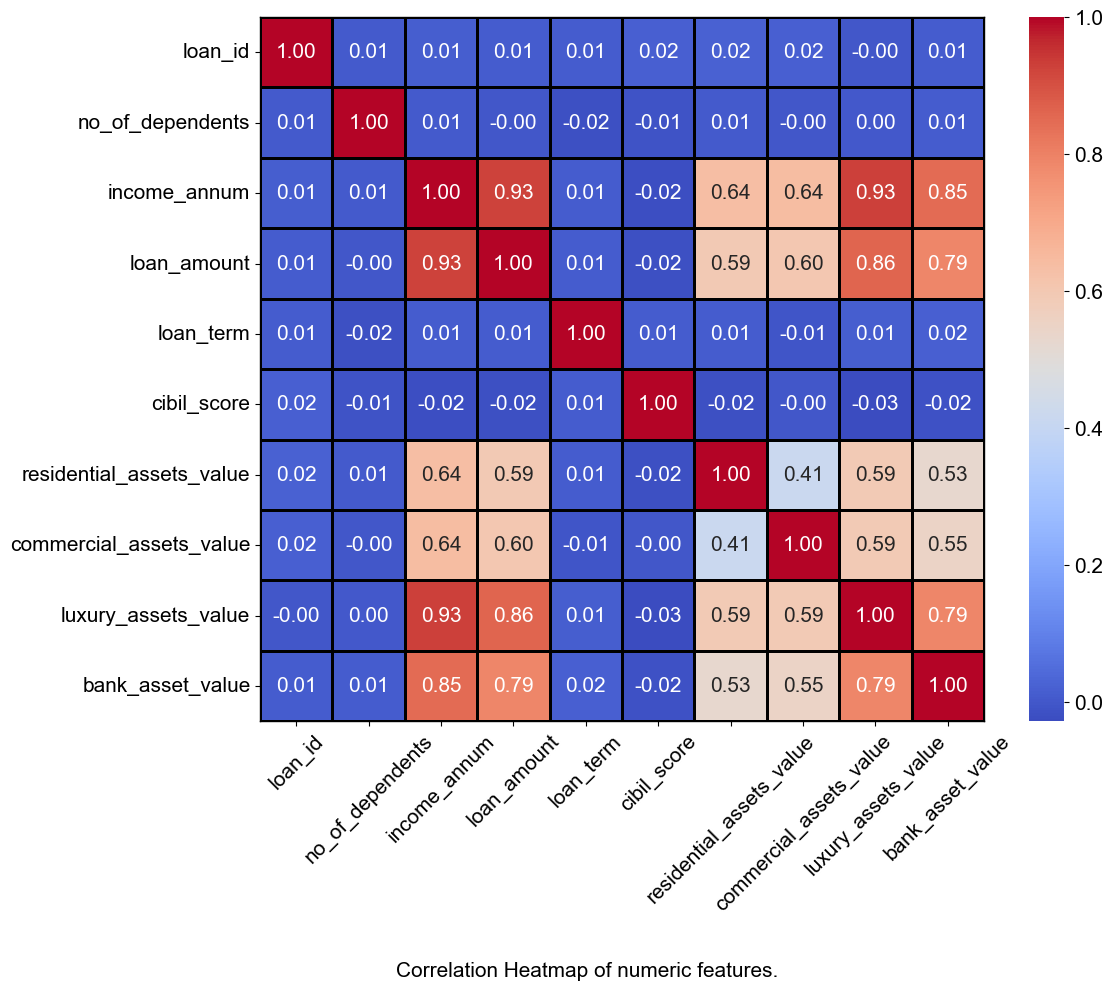

In [12]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df[cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, linecolor='black')

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(bxwidth)

# plt.title("Correlation Matrix") 
plt.xticks(rotation=45)

plt.figtext(0.5, 0.01, "Correlation Heatmap of numeric features.", ha="center", fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("correlation_matrix.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


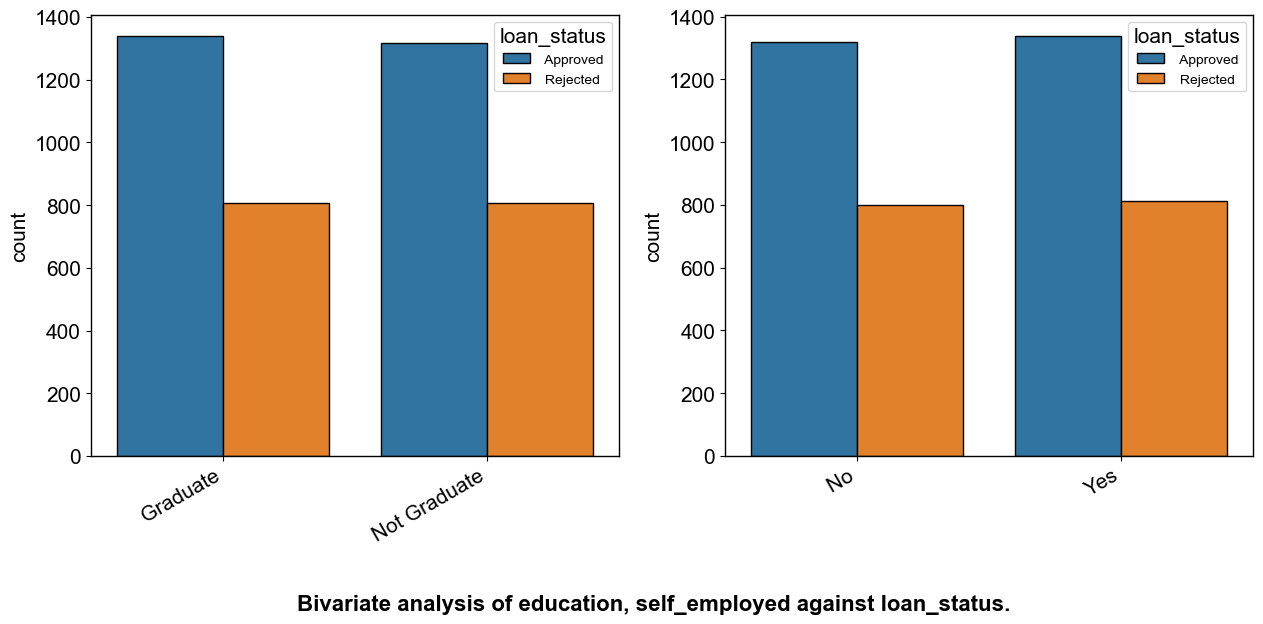

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


rows = math.ceil(len(cat_features) / 2) 
fig, axes = plt.subplots(rows, 2, figsize=(15, 7 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue=target, ax=ax, edgecolor="black")
    
    ax.set_title("")
    ax.set_xlabel("") 
    
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right") 
    ax.legend(title=target, fontsize=10)

    for spine in ax.spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(bottom=0.25, hspace=0.6)

features_list = ", ".join(cat_features)
main_heading = f"Bivariate analysis of {features_list} against {target}."

fig.text(0.5, 0.03, main_heading, ha="center", fontsize=16, fontweight='bold')

plt.savefig("bivariate_analysis.eps", format="eps", dpi=600, bbox_inches="tight")
plt.show()

In [14]:
numerical_cols = df.select_dtypes(include=['int64','float64'])  
categorical_cols = df.select_dtypes(include=['object','category'])
y = df['loan_status']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform(numerical_cols)
scaled

array([[0.00000000e+00, 4.00000000e-01, 9.69072165e-01, ...,
        9.07216495e-01, 5.75835476e-01, 5.44217687e-01],
       [2.34301781e-04, 0.00000000e+00, 4.02061856e-01, ...,
        1.13402062e-01, 2.18508997e-01, 2.24489796e-01],
       [4.68603561e-04, 6.00000000e-01, 9.17525773e-01, ...,
        2.31958763e-01, 8.48329049e-01, 8.70748299e-01],
       ...,
       [9.99531396e-01, 4.00000000e-01, 6.49484536e-01, ...,
        6.39175258e-01, 4.57583548e-01, 4.96598639e-01],
       [9.99765698e-01, 2.00000000e-01, 4.02061856e-01, ...,
        3.60824742e-02, 3.54755784e-01, 3.94557823e-01],
       [1.00000000e+00, 2.00000000e-01, 9.27835052e-01, ...,
        6.08247423e-01, 9.10025707e-01, 8.16326531e-01]])